In [ ]:
# Flight Prices- Complete EDA with Regression
# pandas

# Seaborn

# Exploratory Data Analysis

# Regression

In [ ]:
# FEATURE INFORMATION
# ---The various features of the cleaned dataset are explained below:

# 1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.

# 2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.

# 3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.

# 4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.

# 5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.

# 6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.

# 7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.

# 8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.

# 9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.

# 10)Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.

# 11) Price: Target variable stores information of the ticket price.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Clean_Dataset.csv')
data

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [ ]:
data.describe()

,id,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [ ]:
# Understanding the data by Univariate and Bivariate Analysis
# Unique Airlines
Uniq_Airline = data.airline.unique()
Uniq_Airline

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [ ]:
# Top Most frequent Flights

flights_Code = data.flight.value_counts().head(20).sort_values(ascending=False)

In [ ]:
# Flight counts of different Airlines

flight_Count = data.groupby(['flight','airline'],as_index=False).count()
flight_Count.airline.value_counts()

Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: airline, dtype: int64

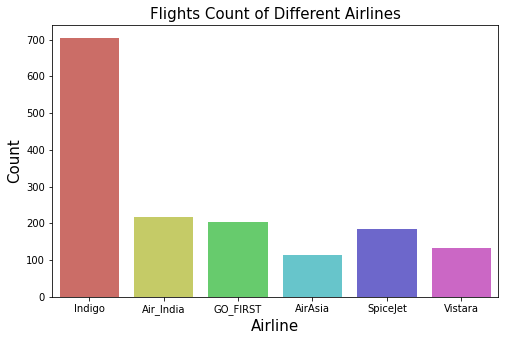

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(flight_Count.airline,palette='hls')
plt.title('Flights Count of Different Airlines',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

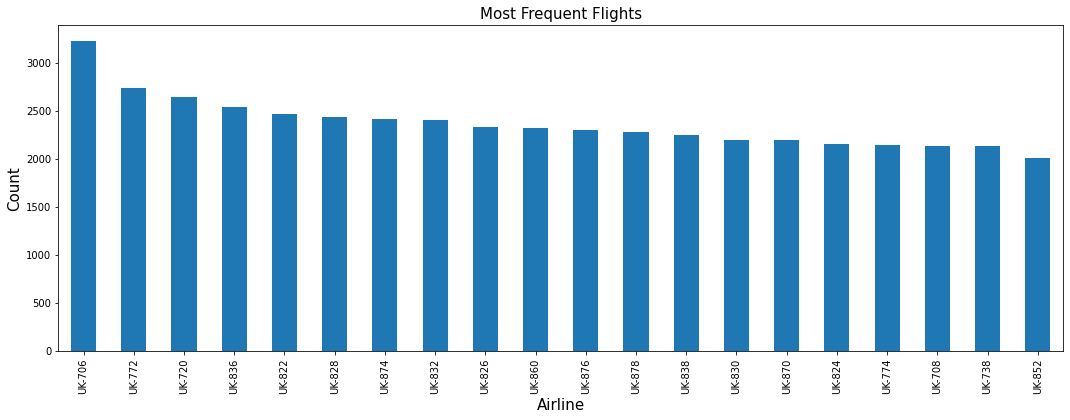

In [ ]:
# Most Frequent Flights

plt.figure(figsize=(18,6))
# sns.countplot(flights_Code,palette='hls')
flights_Code.plot(kind='bar')
plt.title('Most Frequent Flights',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

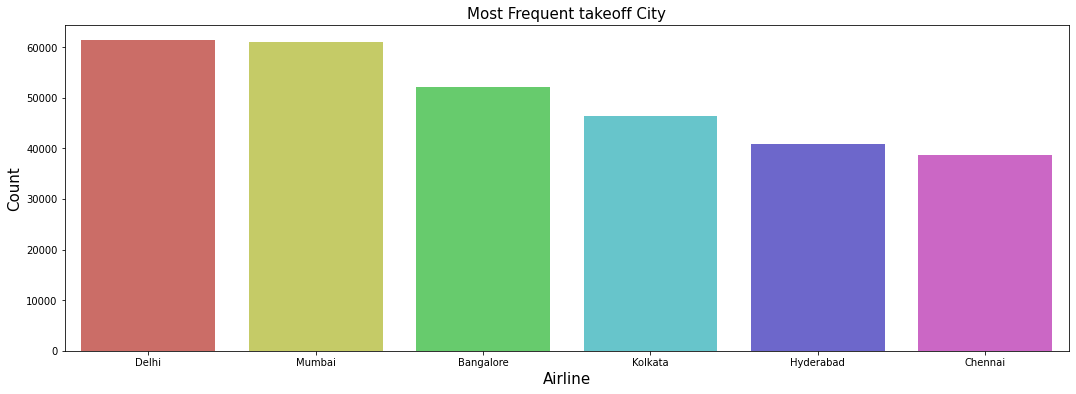

In [ ]:
# Most Frequent takeoff city

plt.figure(figsize=(18,6))
sns.countplot(data['source_city'],palette='hls')
plt.title('Most Frequent takeoff City',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

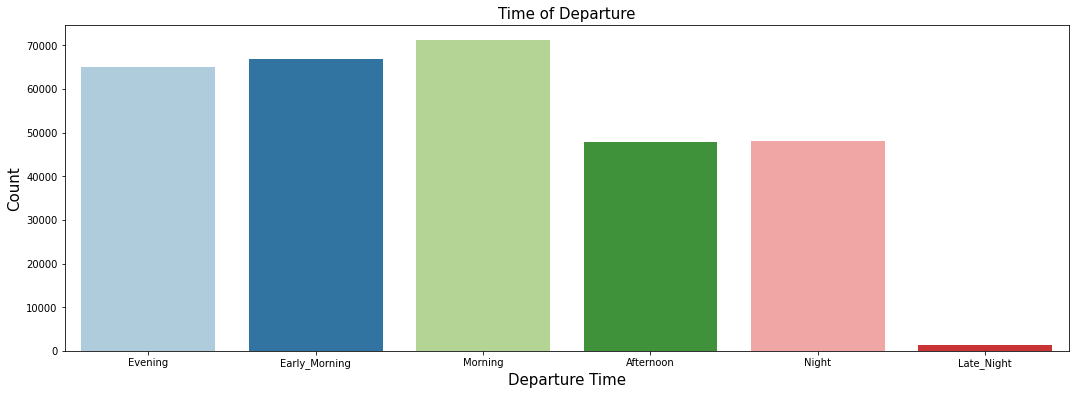

In [ ]:
# Time of Departure

plt.figure(figsize=(18,6))
sns.countplot(data['departure_time'],palette='Paired')
plt.title('Time of Departure',fontsize=15)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

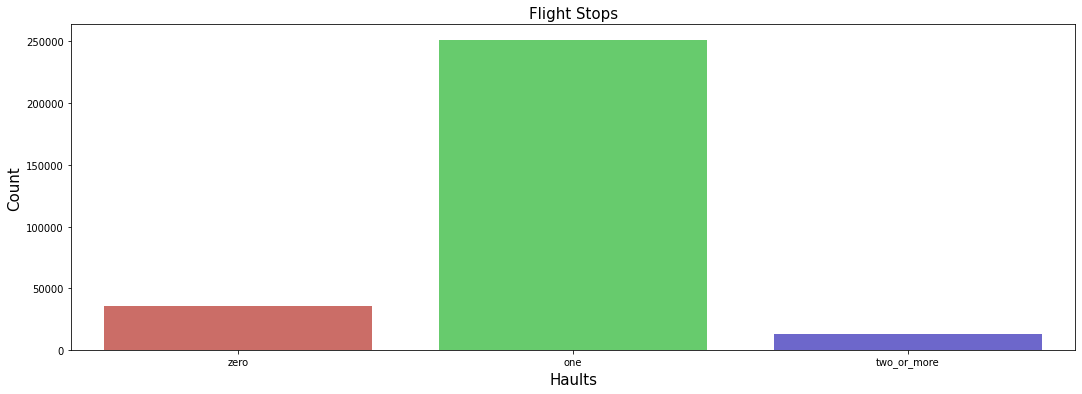

In [ ]:
# Flight haults Count

# data.query('stops=="two_or_more" or stops=="zero"')

plt.figure(figsize=(18,6))
sns.countplot(data['stops'],palette='hls')
plt.title('Flight Stops',fontsize=15)
plt.xlabel('Haults',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

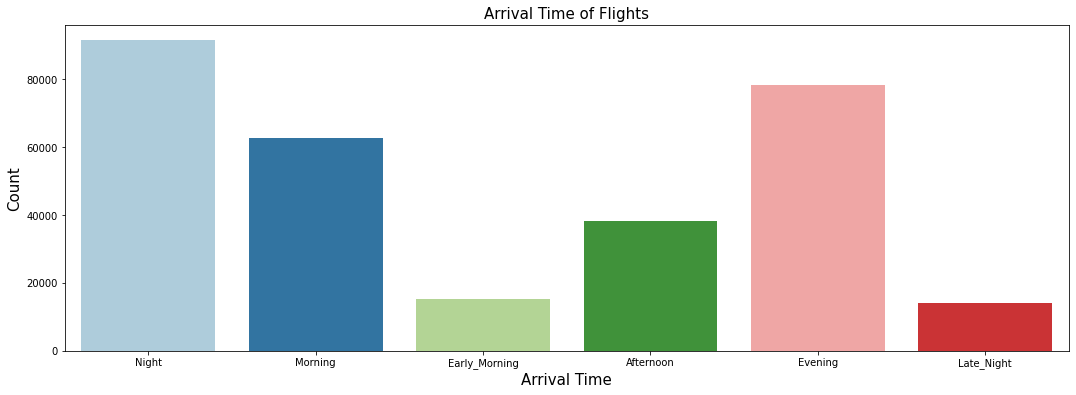

In [ ]:
# Flights Arrival time

plt.figure(figsize=(18,6))
sns.countplot(data['arrival_time'],palette='Paired')
plt.title('Arrival Time of Flights',fontsize=15)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

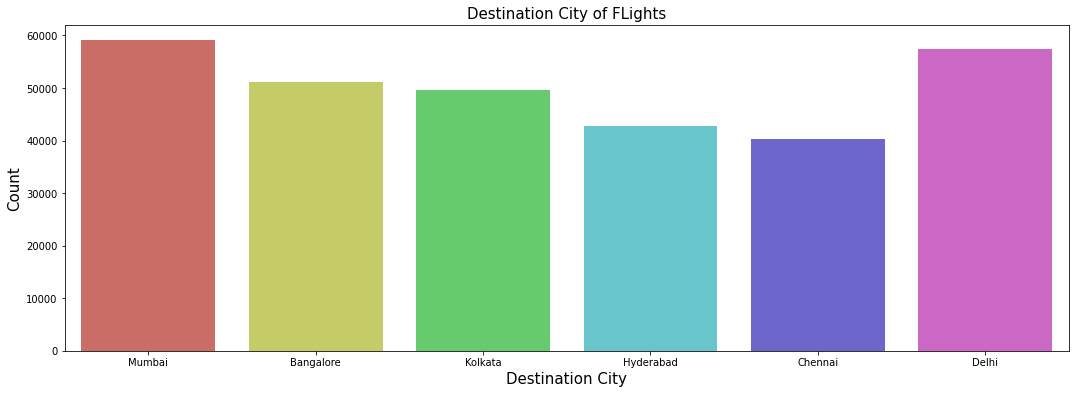

In [ ]:
# Destination City of Flights

plt.figure(figsize=(18,6))
sns.countplot(data['destination_city'],palette='hls')
plt.title('Destination City of FLights',fontsize=15)
plt.xlabel('Destination City',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

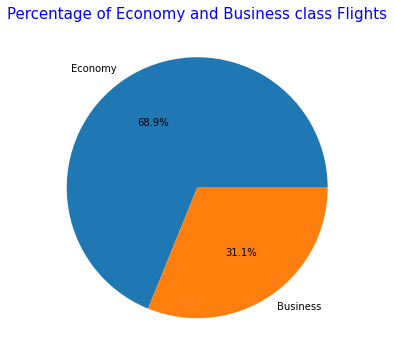

In [ ]:
# Percentage of Economy and Business class Flights

plt.figure(figsize =(10,6))
plt.title('Percentage of Economy and Business class Flights', fontsize=15, color='Blue')
data['class'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.show()

In [ ]:
# Heighest Duration taken by flights to reach destination

max_duration = data.sort_values(by='duration', ascending=False)
max_duration.duration.head(3)

194359    49.83
193889    49.83
261152    47.75
Name: duration, dtype: float64

In [ ]:
max_duration.head(3)

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
194359,194359,Air_India,AI-672,Chennai,Evening,one,Evening,Bangalore,Economy,49.83,9,17538
193889,193889,Air_India,AI-672,Chennai,Evening,two_or_more,Evening,Bangalore,Economy,49.83,2,23891
261152,261152,Air_India,AI-610,Bangalore,Evening,one,Evening,Chennai,Business,47.75,47,55122


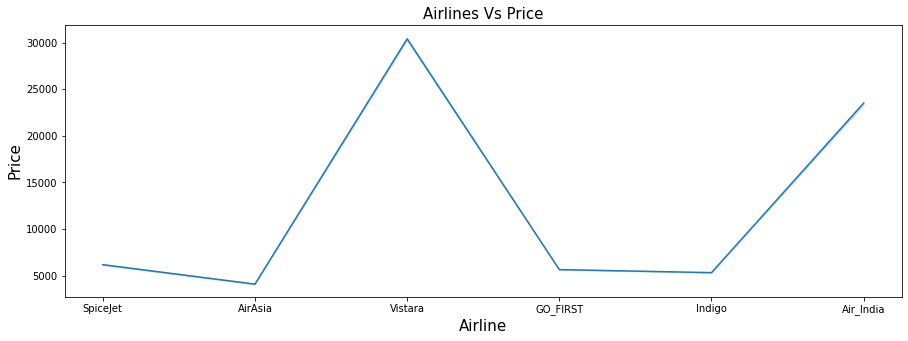

In [ ]:
# Answering Some Questions

# Does price vary with Airlines?

plt.figure(figsize=(15,5))
sns.lineplot(x=data['airline'],y=data['price'])
plt.title('Airlines Vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

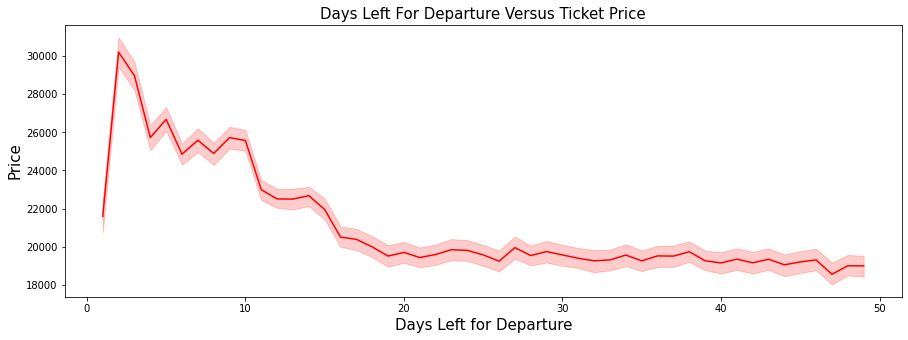

In [ ]:
# How is the price affected when tickets are bought in just 1 or 2 days before departure?

plt.figure(figsize=(15,5))
sns.lineplot(data=data,x='days_left',y='price',color='red')
plt.title('Days Left For Departure Versus Ticket Price',fontsize=15)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

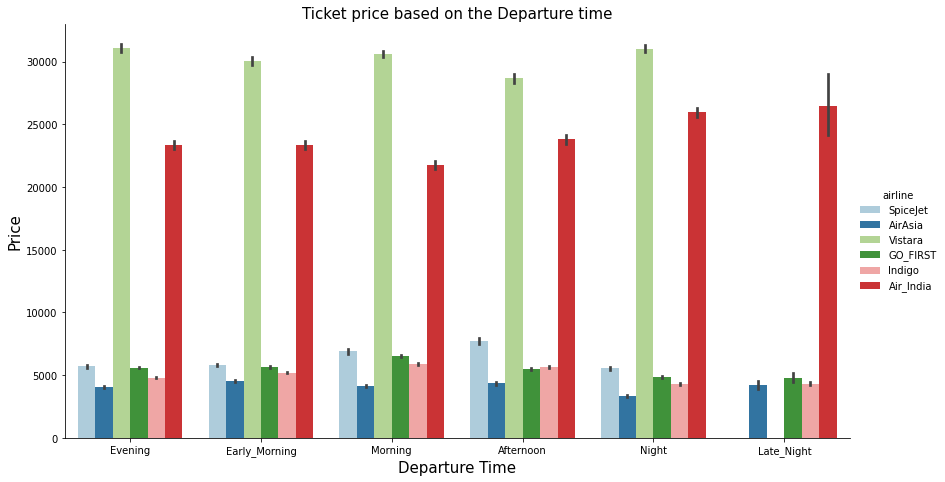

In [ ]:
# Does ticket price change based on the departure time and arrival time?

sns.catplot(data=data, kind="bar", x="departure_time", y="price", hue="airline", height=6.5, aspect=12/6.5 ,palette='Paired')
plt.title('Ticket price based on the Departure time',fontsize=15)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

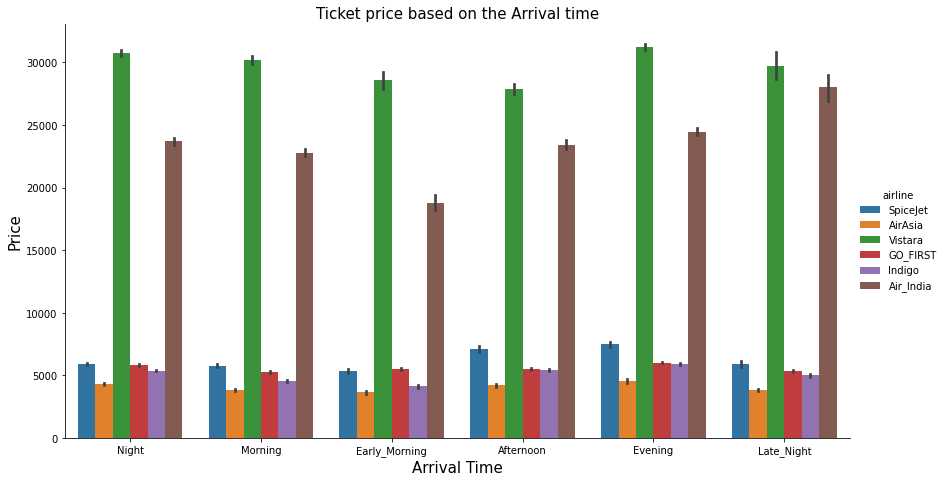

In [ ]:
# Ticket price based on the Arrival time


# plt.figure(figsize=(18,6))
sns.catplot(data=data, kind="bar", x="arrival_time", y="price", hue="airline", height=6.5, aspect=12/6.5)
plt.title('Ticket price based on the Arrival time',fontsize=15)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

In [ ]:
# How the price changes with change in Source and Destination?
 
data.groupby(['airline','source_city','destination_city'],as_index=False)['price'].mean()

,airline,source_city,destination_city,price
0,AirAsia,Bangalore,Chennai,2073.043478
1,AirAsia,Bangalore,Delhi,4807.092426
2,AirAsia,Bangalore,Hyderabad,2931.494792
3,AirAsia,Bangalore,Kolkata,4443.468160
4,AirAsia,Bangalore,Mumbai,3342.385350
...,...,...,...,...
172,Vistara,Mumbai,Bangalore,35029.880315
173,Vistara,Mumbai,Chennai,32181.946251
174,Vistara,Mumbai,Delhi,26402.695114
175,Vistara,Mumbai,Hyderabad,29497.578017


Text(0, 0.5, 'Price')

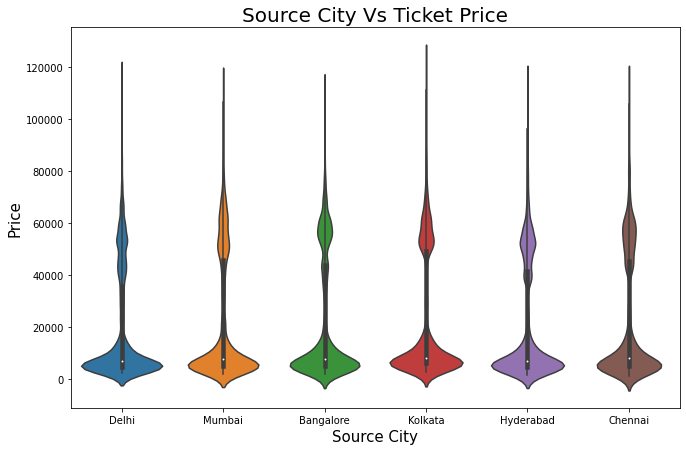

In [ ]:
# find Source City Vs Ticket Price?

plt.figure(figsize=(24,7))
plt.subplot(1,2,1)
sns.violinplot(x='source_city',y='price',data=data)
plt.title('Source City Vs Ticket Price',fontsize=20)
plt.xlabel('Source City',fontsize=15)
plt.ylabel('Price',fontsize=15)

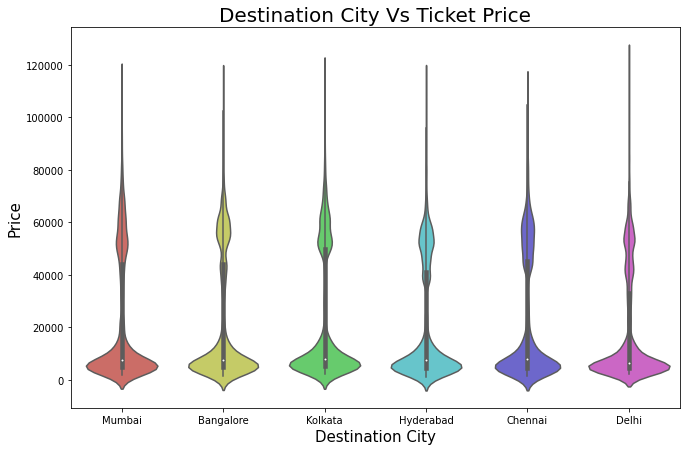

In [ ]:
# find Destination City Vs Ticket Price?
plt.figure(figsize=(24,7))
plt.subplot(1,2,2)
sns.violinplot(x='destination_city',y='price',data=data,palette='hls')
plt.title('Destination City Vs Ticket Price',fontsize=20)
plt.xlabel('Destination City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()  

In [ ]:
#  How does the ticket price vary between Economy and Business class?

class_Ticket_Price = data.groupby(['class'])['price'].mean()

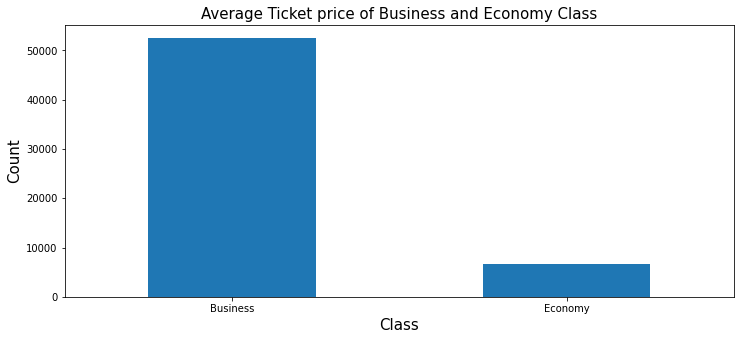

In [ ]:
plt.figure(figsize=(12,5))
# sns.countplot(flights_Code,palette='hls')
class_Ticket_Price.plot(kind='bar')
plt.title('Average Ticket price of Business and Economy Class',fontsize=15)
plt.xlabel('Class',fontsize=15)
plt.xticks(rotation=0)
plt.ylabel('Count',fontsize=15)
plt.show()

#Which airline has the most business class tickets

In [ ]:
data.groupby(['airline'])['class'].count()

airline
AirAsia       16098
Air_India     80892
GO_FIRST      23173
Indigo        43120
SpiceJet       9011
Vistara      127859
Name: class, dtype: int64

In [ ]:
# Model Making

# Label Encoding all the Columns

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col])

In [ ]:
# storing the Dependent Variables in X and Independent Variable in Y

X = data.drop('price', axis=1)
Y = data['price']

In [ ]:
# Creating the train test split

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.30, random_state=101)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape 

((210107, 11), (90046, 11), (210107,), (90046,))

In [ ]:
# Transforming each value in the column proportionally within the range [0,1]

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0,1))
X_train = mmscaler.fit_transform(X_train)
X_test = mmscaler.fit_transform(X_test)
# Y_train = mmscaler.fit_transform(Y_train)
# Y_test = mmscaler.fit_transform(Y_test)
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)

In [ ]:
# Building the Regression Model

from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train, Y_train)
y_pred = LR.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(Y_test, y_pred),3))  
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(Y_test, y_pred),3))  
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(Y_test, y_pred)),3))
print('R2_score:', round(metrics.r2_score(Y_test, y_pred),6))

Mean Absolute Error (MAE): 4654.748
Mean Squared Error (MSE): 49115624.128
Root Mean Squared Error (RMSE): 7008.254
R2_score: 0.904274


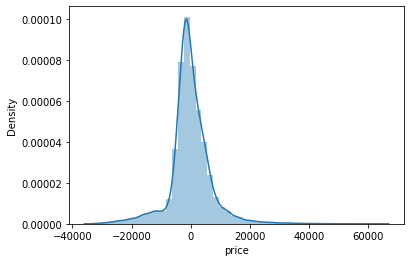

In [ ]:
sns.distplot(Y_test-y_pred)
plt.show()